# Fatal_Force

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [260]:
# %pip install --upgrade plotly

## Import Statements

In [261]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
# This might be helpful:
from collections import Counter

## Notebook Presentation

In [262]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [263]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [264]:
#df shapes
print(f'''
      fatalities        {df_fatalities.shape},
      hh_income         {df_hh_income.shape},
      pct_completed_hs  {df_pct_completed_hs.shape},
      pct_poverty       {df_pct_poverty.shape},
      share_race_city   {df_share_race_city.shape}''')


      fatalities        (2535, 14),
      hh_income         (29322, 3),
      pct_completed_hs  (29329, 3),
      pct_poverty       (29329, 3),
      share_race_city   (29268, 7)


In [265]:
print(df_fatalities.columns)
print(df_hh_income.columns)
print(df_pct_completed_hs.columns)
print(df_pct_poverty.columns)
print(df_share_race_city.columns)

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')
Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')


In [266]:
print(df_fatalities.isnull().sum())
print('----------------------------------------')
print(df_hh_income.isnull().sum())
print('----------------------------------------')
print(df_pct_completed_hs.isnull().sum())
print('----------------------------------------')
print(df_pct_poverty.isnull().sum())
print('----------------------------------------')
print(df_share_race_city.isnull().sum())

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64
----------------------------------------
Geographic Area     0
City                0
Median Income      51
dtype: int64
----------------------------------------
Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64
----------------------------------------
Geographic Area    0
City               0
poverty_rate       0
dtype: int64
----------------------------------------
Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_as

In [267]:
def add_label(y):
    for i, v in enumerate(y):
        plt.text(i, v + 2, str(v), ha='center')

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [268]:
# df_fatalities=df_fatalities.fillna(df_fatalities.mean)

In [269]:
# df_hh_income=df_hh_income.fillna(df_hh_income.mean)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [270]:
df_pct_poverty['poverty_rate'] =df_pct_poverty['poverty_rate'].replace('-','')


In [271]:
#change data type
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'] ,downcast='float' )

In [272]:
df_pct_poverty2=df_pct_poverty.groupby(['Geographic Area'],as_index=False).agg({'poverty_rate':pd.Series.mean})
df_pct_poverty2.sort_values(by='poverty_rate',ascending=False,inplace=True)

In [273]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'],downcast='float' )


In [274]:
fig=px.bar(df_pct_poverty2 ,
           y=df_pct_poverty2.poverty_rate,
           x=df_pct_poverty2['Geographic Area'],
          title='Poverty Rate by US State',
          color=df_pct_poverty2.poverty_rate,
          color_continuous_scale='Aggrnyl',)
fig.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [275]:
#rempve the '-'' from the colmn
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].replace('-','')

In [276]:
#change data type
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'] ,downcast='float' )

In [277]:
df_pct_completed_hs2=df_pct_completed_hs.groupby(['Geographic Area'],as_index=False).agg({'percent_completed_hs':pd.Series.mean})
df_pct_completed_hs2.sort_values(by='percent_completed_hs',ascending=False,inplace=True)

In [278]:
fig=px.bar(df_pct_completed_hs2 ,
           y=df_pct_completed_hs2.percent_completed_hs,
           x=df_pct_completed_hs2['Geographic Area'],
          title='Graduation Rate by US State',
          color=df_pct_completed_hs2.percent_completed_hs,
          )
fig.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [279]:
merged_Data=df_pct_poverty.merge(df_pct_completed_hs , on=['Geographic Area','City'])
grouped_df = merged_Data.groupby('Geographic Area')[['poverty_rate', 'percent_completed_hs']].mean().reset_index()
grouped_df.head(1)

,Geographic Area,poverty_rate,percent_completed_hs
0,AK,19.85,84.63


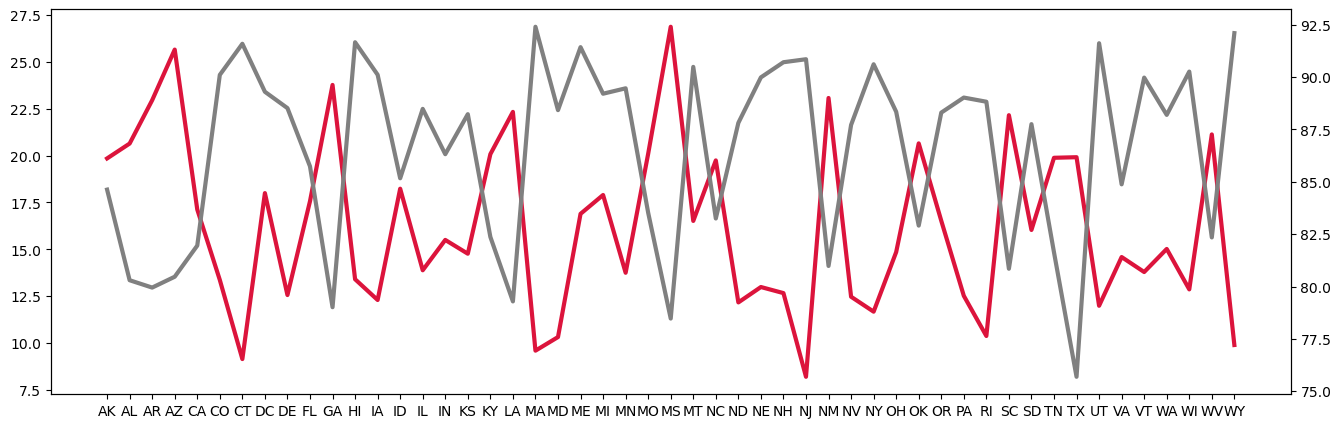

In [280]:
plt.figure(figsize=(16,5))
ax1 = plt.gca()
ax2 = ax1.twinx() # create second y-axis
 
ax1.plot(grouped_df['Geographic Area'], 
        grouped_df.poverty_rate, 
        c='crimson', 
        linewidth=3,)
 
# Adding prize share plot on second axis
ax2.plot(grouped_df['Geographic Area'], 
        grouped_df.percent_completed_hs, 
        c='grey', 
        linewidth=3,)
 
plt.show()


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

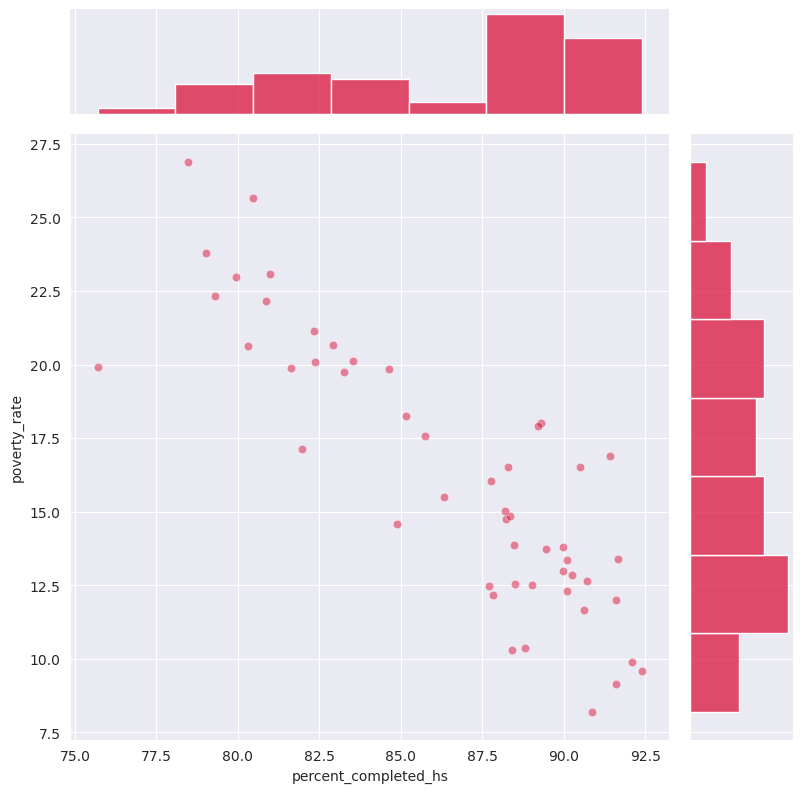

In [281]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=grouped_df['percent_completed_hs'], 
                y=grouped_df.poverty_rate, 
                height=8, 
#                 kde=True,             
                color='crimson', 
                joint_kws={'alpha':0.5})

plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

<AxesSubplot:xlabel='percent_completed_hs', ylabel='poverty_rate'>

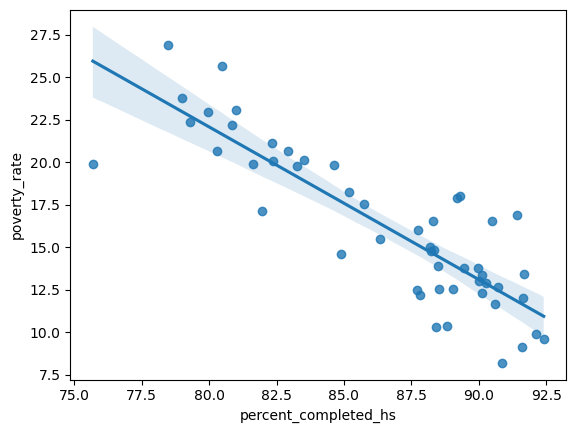

In [282]:
sns.regplot(x=grouped_df['percent_completed_hs'], 
                y=grouped_df.poverty_rate, )

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [283]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [284]:
# Assuming df_share_race_city is your DataFrame
for column in df_share_race_city.columns:
    if column != 'City' and column != 'Geographic area':
        df_share_race_city[column] = df_share_race_city[column].replace('(X)', '0').astype(float)
    

In [285]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        29268 non-null  object 
 1   City                   29268 non-null  object 
 2   share_white            29268 non-null  float64
 3   share_black            29268 non-null  float64
 4   share_native_american  29268 non-null  float64
 5   share_asian            29268 non-null  float64
 6   share_hispanic         29268 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


In [286]:
df=df_share_race_city
df.drop(columns=['City'],axis=1)

,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,67.20,30.20,0.00,0.00,1.60
1,AL,54.40,41.40,0.10,1.00,3.10
2,AL,52.30,44.90,0.50,0.30,2.30
3,AL,99.10,0.10,0.00,0.10,0.40
4,AL,13.20,86.50,0.00,0.00,0.30
...,...,...,...,...,...,...
29263,WY,95.90,0.00,0.00,2.10,0.00
29264,WY,89.90,0.30,1.30,0.60,16.60
29265,WY,94.50,0.10,1.40,0.20,6.20
29266,WY,97.40,0.00,0.00,0.00,4.00


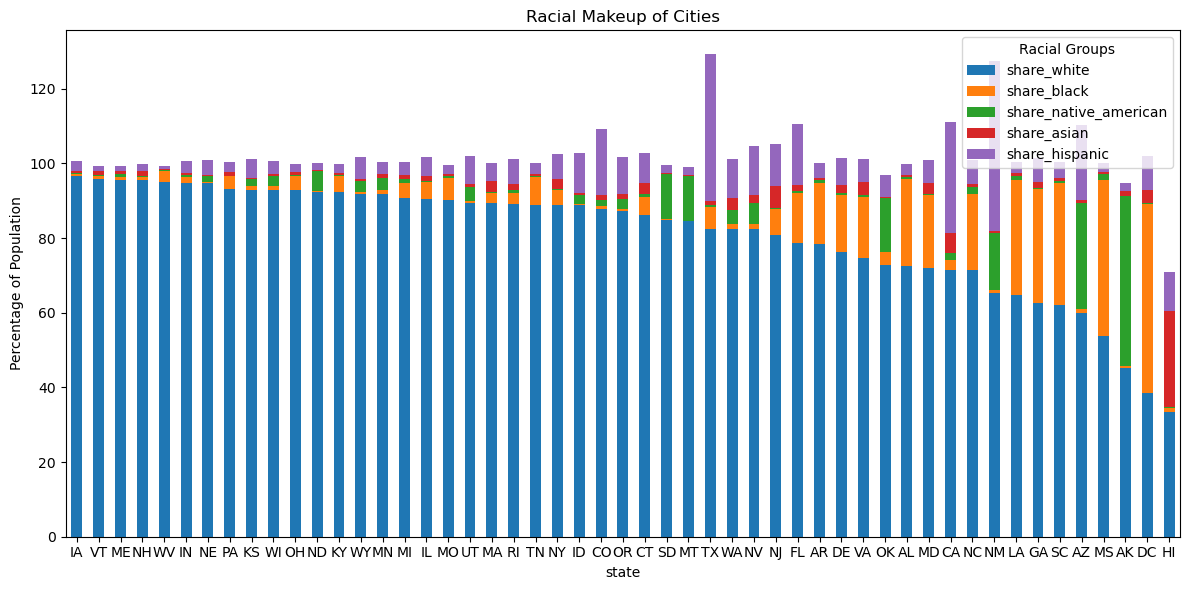

In [287]:
df=df.groupby(['Geographic area'],as_index=True).agg({
    'share_white': 'mean',
    'share_black': 'mean',
    'share_native_american': 'mean',
    'share_asian': 'mean',
    'share_hispanic': 'mean'
})
df=df.sort_values(by='share_white',ascending=False)

# Create a stacked bar chart
ax = df.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add labels and legend
ax.set_xlabel('state')
ax.set_ylabel('Percentage of Population')
ax.set_title('Racial Makeup of Cities')
ax.legend(title='Racial Groups')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [288]:
df_share_race_city

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.20,30.20,0.00,0.00,1.60
1,AL,Abbeville city,54.40,41.40,0.10,1.00,3.10
2,AL,Adamsville city,52.30,44.90,0.50,0.30,2.30
3,AL,Addison town,99.10,0.10,0.00,0.10,0.40
4,AL,Akron town,13.20,86.50,0.00,0.00,0.30
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.90,0.00,0.00,2.10,0.00
29264,WY,Worland city,89.90,0.30,1.30,0.60,16.60
29265,WY,Wright town,94.50,0.10,1.40,0.20,6.20
29266,WY,Yoder town,97.40,0.00,0.00,0.00,4.00


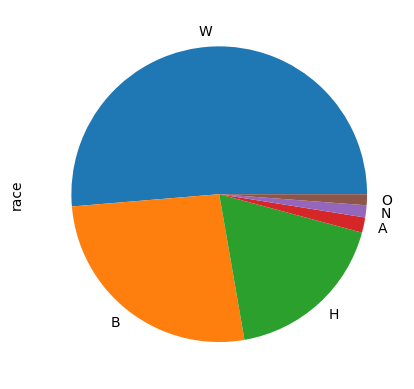

In [289]:

df_fatalities['race'].value_counts().plot.pie();

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

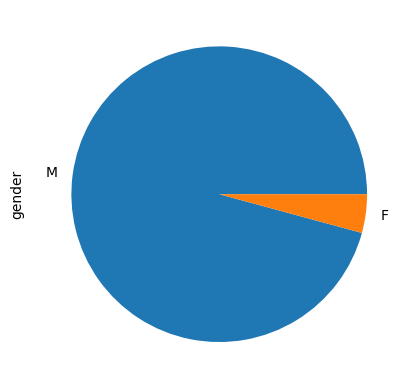

In [290]:

df_fatalities['gender'].value_counts().plot.pie();

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [291]:
df_fatalities['age']=pd.to_numeric(df_fatalities['age'],downcast='integer', errors='coerce')

In [292]:
box = px.box(df_fatalities, 
             y='age', 
             x='manner_of_death',
             color='gender',
             title='How Have the age Changed with  Manner of Death?')
 
box.update_layout(xaxis_title='Manner of Death',
                  yaxis_title='age',)
 
box.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

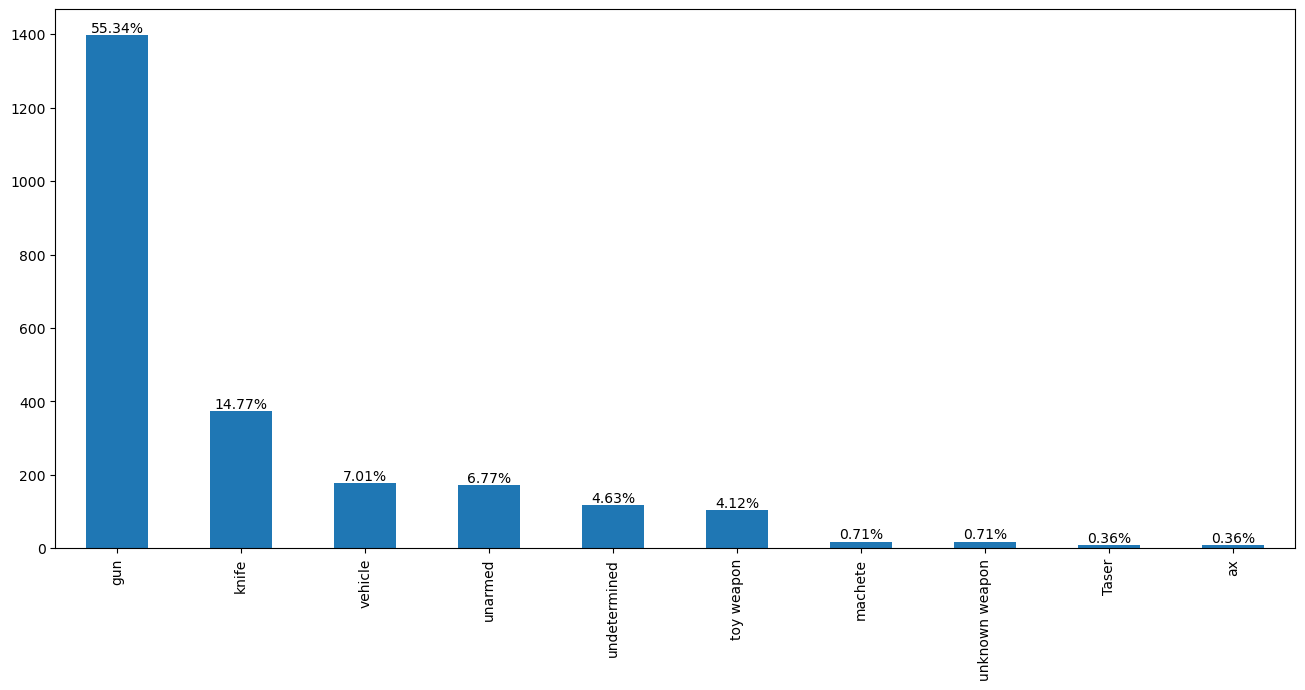

In [293]:
plt.figure(figsize=(16,7))
ax=df_fatalities['armed'].value_counts().nlargest(10).plot.bar()

# Add labels for percentage of total
total = df_fatalities['armed'].value_counts().sum()
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    
plt.show()    

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

Text(0.5, 1.0, '% of poeple under 25')

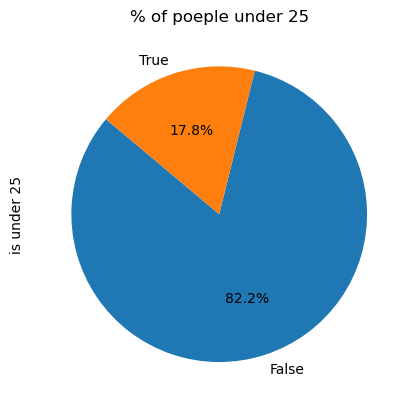

In [294]:
df=df_fatalities
df['is under 25']=df['age'].apply(lambda x: True if x < 25 else False)
df['is under 25'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title("% of poeple under 25")

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

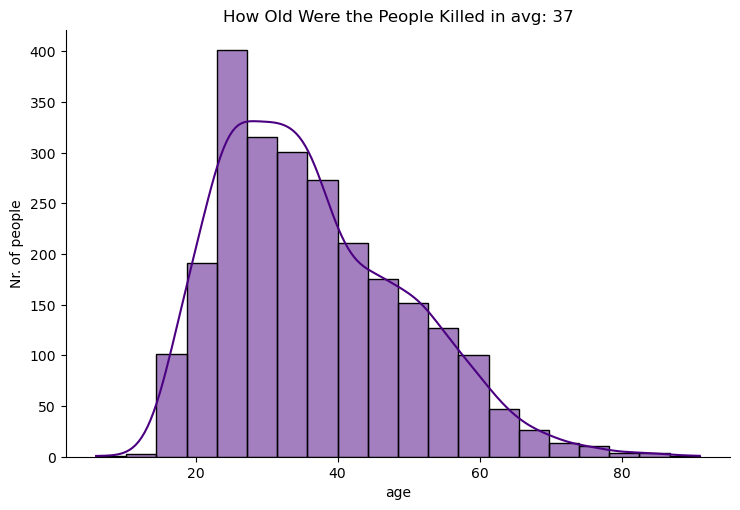

In [295]:
sns.displot(df_fatalities.age, 
            bins=20, 
            aspect=1.5,
            kde=True, 
            color='indigo')

plt.title(f'How Old Were the People Killed in avg: {(round(df_fatalities.age.mean()))}')
plt.xlabel('age')
plt.ylabel('Nr. of people')

plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

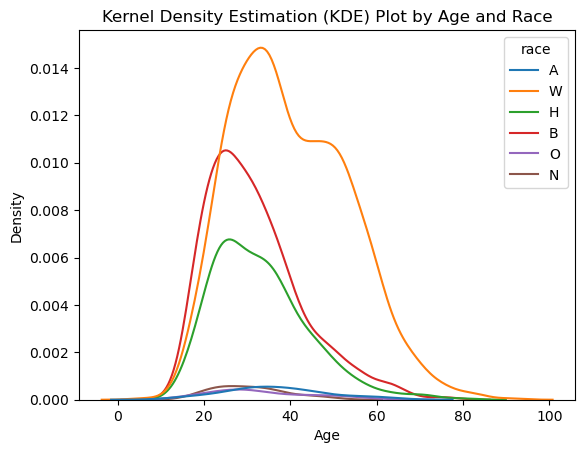

In [296]:
sns.kdeplot(data=df_fatalities, x="age",hue='race',legend=True)

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Kernel Density Estimation (KDE) Plot by Age and Race')

plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

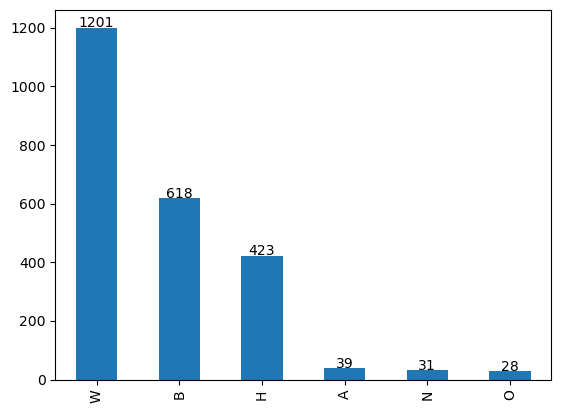

In [297]:
df_fatalities['race'].value_counts().plot.bar()
add_label(df_fatalities['race'].value_counts())
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

<AxesSubplot:ylabel='signs_of_mental_illness'>

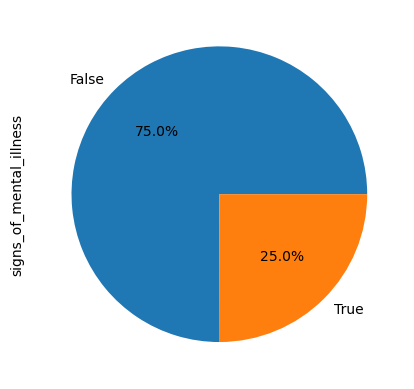

In [298]:
df_fatalities['signs_of_mental_illness'].value_counts().plot.pie(autopct='%1.1f%%')

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

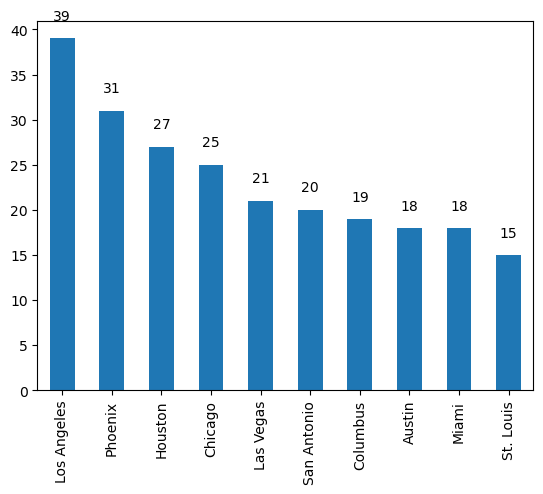

In [299]:
df_fatalities['city'].value_counts().nlargest(10).plot.bar()
add_label(df_fatalities['city'].value_counts().nlargest(10))

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [327]:
Killings_by_State=df_fatalities.groupby('state',as_index=False).agg({'flee':pd.Series.count})


In [328]:
fig = px.choropleth(Killings_by_State, 
                    locations='state',
                     locationmode="USA-states",
                     scope="usa",
                    color='flee',
                    color_continuous_scale=px.colors.sequential.matter,
                    range_color=(min(df_fatalities.state.value_counts()), max(df_fatalities.state.value_counts())),
                    hover_name='state'
                        )

fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [302]:
df_fatalities['date']=pd.to_datetime(df_fatalities['date']).dt.strftime('%Y-%B')
df=df_fatalities.groupby(['date'],as_index=False).agg({'flee':pd.Series.count})


In [329]:
fig = px.line(df, x="date", y='flee', title='Number of Police Killings Over Time')
fig.show()